In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from google.colab.patches import cv2_imshow
from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import find_peaks
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, AveragePooling3D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

In [3]:
video = cv2.VideoCapture('/content/drive/MyDrive/UBFC_DATASET/DATASET_2/subject13/vid.avi')

fps = video.get(cv2.CAP_PROP_FPS)

print('FPS:', fps)

video.release()

FPS: 29.7903


In [8]:
npz_file_path = '/content/drive/MyDrive/everglow/ubfc-rppg/HR-npz/subject1.npz'

data = np.load(npz_file_path)
print(data['video'].shape)
print(data['wave'].shape)
print(data['hr'].shape)

(1547, 64, 64, 3)
(1547,)
(1547,)


Heart Rate (BPM): [81.24627273 89.3709     47.03731579 52.57111765 89.3709     33.72486792
 47.03731579 52.57111765 52.57111765 37.237875   66.20066667 47.03731579
 55.8568125  89.3709     57.65864516 52.57111765 61.63510345 89.3709
 55.8568125  54.16418182 54.16418182 39.7204     54.16418182 51.06908571
 34.37342308 36.47791837 57.65864516 57.65864516 37.237875   35.74836
 49.6505     59.5806     51.06908571 59.5806     59.5806     57.65864516
 33.72486792 52.57111765 54.16418182 55.8568125  55.8568125  59.5806
 52.57111765 35.74836   ]
Mean HR:  54.725633471199444


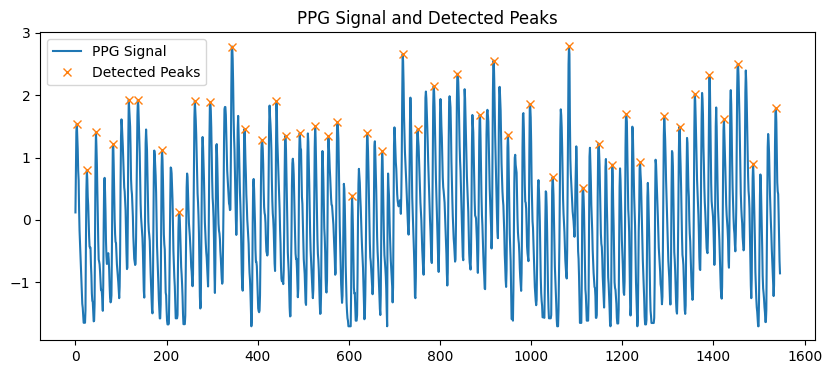

In [6]:
ppg_signal = wave

# 피크 검출
peaks, _ = find_peaks(ppg_signal, distance=20)  # 'distance'는 최소 피크 간격을 의미합니다. 실제 데이터에 맞게 조정하세요.

# 피크 사이의 시간 간격 계산 (샘플)
# 여기서는 샘플레이트가 1Hz라고 가정합니다. 실제 샘플레이트를 사용하세요.
sample_rate = fps  # Hz
peak_intervals = np.diff(peaks) / sample_rate

# 심박수 계산
heart_rate = 60 / peak_intervals  # 분당 박동수로 변환

print("Heart Rate (BPM):", heart_rate)

print('Mean HR: ', np.mean(heart_rate))

# 시각화
plt.figure(figsize=(10, 4))
plt.plot(ppg_signal, label='PPG Signal')
plt.plot(peaks, ppg_signal[peaks], "x", label='Detected Peaks')
plt.title("PPG Signal and Detected Peaks")
plt.legend()
plt.show()

In [9]:
df = pd.read_csv('/content/drive/MyDrive/everglow/ubfc-rppg/metadata_hr_csv_path.csv')
df

,id,path
0,1,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
1,3,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
2,4,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
3,5,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
4,8,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
5,9,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
6,10,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
7,11,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
8,12,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...
9,13,/content/drive/MyDrive/everglow/ubfc-rppg/HR-n...


In [10]:
frame_counts = []
for _, row in df.iterrows():
    with np.load(row['path'], allow_pickle=True) as data:
        video = data['video']
        frame_counts.append(video.shape[0])  # 비디오 시퀀스의 길이 (프레임 수) 추가

# 최소 프레임 수 찾기
min_frames = min(frame_counts)
print(f"Minimum number of frames in the dataset: {min_frames}")

Minimum number of frames in the dataset: 1368


In [11]:
def calculate_hr(wave):
  ppg_signal = wave

  # 피크 검출
  peaks, _ = find_peaks(ppg_signal, distance=20)  # 'distance'는 최소 피크 간격을 의미합니다. 실제 데이터에 맞게 조정하세요.

  # 피크 사이의 시간 간격 계산 (샘플)
  # 여기서는 샘플레이트가 1Hz라고 가정합니다. 실제 샘플레이트를 사용하세요.
  sample_rate = fps  # Hz
  peak_intervals = np.diff(peaks) / sample_rate

  # 심박수 계산
  heart_rate = 60 / peak_intervals  # 분당 박동수로 변환

  return np.mean(heart_rate)

In [13]:
def load_dataset(df):
    video_data = []
    ppg_data = []
    hr_data = []

    for _, row in df.iterrows():
        with np.load(row['path']) as data:
            video = data['video']
            wave = data['wave']
            hr = data['hr']
            if video.shape[0] > min_frames:
                video = video[:min_frames]
                wave = wave[:min_frames]
                hr = hr[:min_frames]

            video_data.append(video)
            ppg_data.append(wave)
            hr_data.append(hr)
            ## 모델 입력을 HR로 할 결루
            # heart_rate = calculate_hr(wave)
            # ppg_data.append(heart_rate)

    return np.array(video_data), np.array(hr_data)

video_data, ppg_data = load_dataset(df)

In [14]:
# VGG 스타일의 3D CNN 모델을 생성하는 함수
def VGG_3D(input_shape, num_classes):
    model = Sequential()

    # 첫 번째 블록
    model.add(Conv3D(64, (3, 3, 3), padding='same', activation='relu',
                     input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(Conv3D(64, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(AveragePooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

    # 두 번째 블록
    model.add(Conv3D(128, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(128, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(AveragePooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

    # 세 번째 블록
    model.add(Conv3D(256, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(256, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(256, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(AveragePooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

    # 네 번째 블록
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(AveragePooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

    # 다섯 번째 블록
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
    model.add(AveragePooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

    # 분류를 위한 완전 연결 레이어
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(min_frames, activation='linear'))  # 회귀 문제이므로 'linear' 활성화 함수 사용

    return model

# 모델 생성
input_shape = (min_frames, 64, 64, 3)  # 입력 형태 정의 (프레임 수, 높이, 너비, 채널)
num_classes = 1  # PPG 신호의 경우 연속적인


In [15]:
# 데이터를 학습, 검증, 테스트 세트로 분할
video_train, video_test, ppg_train, ppg_test = train_test_split(video_data, ppg_data, test_size=0.2, random_state=42)
video_train, video_val, ppg_train, ppg_val = train_test_split(video_train, ppg_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"video_train shape: {video_train.shape}")
print(f"video_val shape: {video_val.shape}")
print(f"video_test shape: {video_test.shape}")
print(f"ppg_train shape: {ppg_train.shape}")
print(f"ppg_val shape: {ppg_val.shape}")
print(f"ppg_test shape: {ppg_test.shape}")

video_train shape: (24, 1368, 64, 64, 3)
video_val shape: (9, 1368, 64, 64, 3)
video_test shape: (9, 1368, 64, 64, 3)
ppg_train shape: (24, 1368)
ppg_val shape: (9, 1368)
ppg_test shape: (9, 1368)


In [16]:
# RMSE 손실 함수
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = VGG_3D(input_shape=(min_frames, 64, 64, 3), num_classes=1)

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=Adam(), loss=root_mean_squared_error)

# 모델 학습
history = model.fit(video_train, ppg_train, validation_data=(video_val, ppg_val), epochs=50, batch_size=1)



Epoch 1/50
24/24 [==============================] - 127s 3s/step - loss: 25423.5684 - val_loss: 144.9770
Epoch 2/50
24/24 [==============================] - 22s 927ms/step - loss: 51.2630 - val_loss: 16.6988
Epoch 3/50
24/24 [==============================] - 22s 931ms/step - loss: 46.4350 - val_loss: 72.9347
Epoch 4/50
24/24 [==============================] - 22s 930ms/step - loss: 60.5975 - val_loss: 31.0697
Epoch 5/50
24/24 [==============================] - 22s 928ms/step - loss: 44.8789 - val_loss: 27.3020
Epoch 6/50
24/24 [==============================] - 22s 926ms/step - loss: 42.3958 - val_loss: 17.5002
Epoch 7/50
24/24 [==============================] - 22s 926ms/step - loss: 54.7268 - val_loss: 86.5545
Epoch 8/50
24/24 [==============================] - 22s 927ms/step - loss: 62.6904 - val_loss: 84.3582
Epoch 9/50
24/24 [==============================] - 22s 927ms/step - loss: 67.2505 - val_loss: 40.4996
Epoch 10/50
24/24 [==============================] - 22s 926ms/step - l

In [17]:
# 테스트 데이터로 성능 평가
test_loss = model.evaluate(video_test, ppg_test, batch_size=1)
print(f'Test RMSE: {test_loss}')

predicted_ppg = model.predict(video_test, batch_size=1)

9/9 [==============================] - 2s 232ms/step - loss: 29.1239
Test RMSE: 29.123905181884766
9/9 [==============================] - 2s 229ms/step


In [18]:
# 예측 결과 출력
print(predicted_ppg[0])
print(predicted_ppg[1])


[73.94148 74.05709 73.83586 ... 77.55354 77.61314 77.71996]
[73.805   73.92044 73.69966 ... 77.41004 77.46974 77.57627]


[120. 120. 120. ... 116. 116. 116.]
[73.94148 74.05709 73.83586 ... 77.55354 77.61314 77.71996]


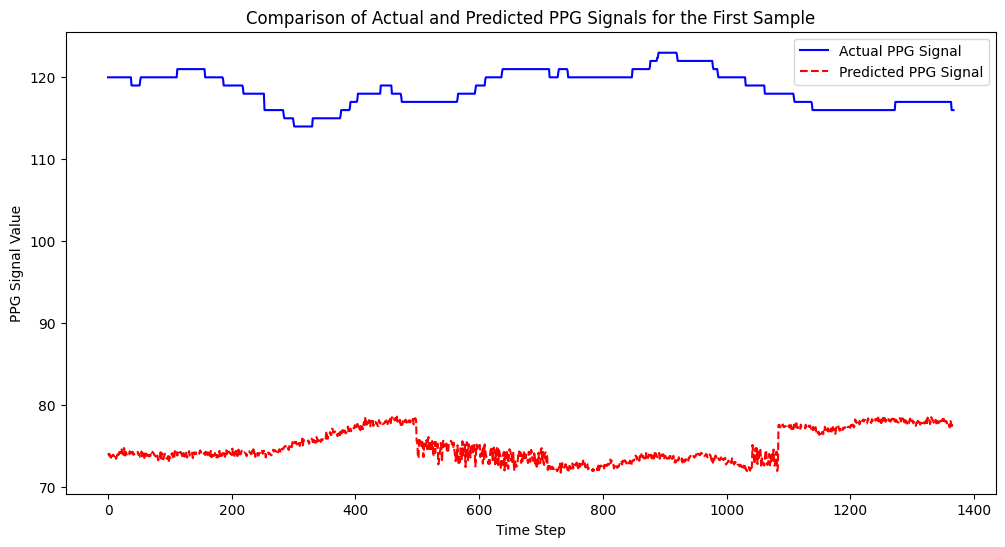

In [21]:
print(ppg_test[0])
print(predicted_ppg[0])

plt.figure(figsize=(12, 6))
plt.plot(ppg_test[0], label='Actual PPG Signal', color='blue')
plt.plot(predicted_ppg[0], label='Predicted PPG Signal', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted PPG Signals for the First Sample')
plt.xlabel('Time Step')
plt.ylabel('PPG Signal Value')
plt.legend()
plt.show()


[94.75 95.   95.   ... 92.   92.   92.  ]
[73.826996 73.94239  73.721565 ... 77.43318  77.492836 77.59934 ]


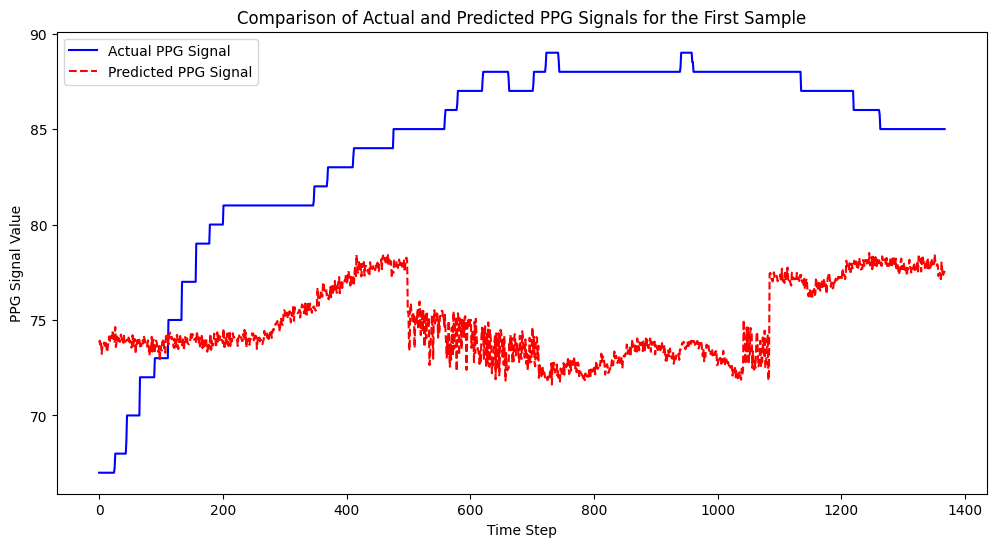

In [24]:
print(ppg_test[6])
print(predicted_ppg[6])

plt.figure(figsize=(12, 6))
plt.plot(ppg_test[1], label='Actual PPG Signal', color='blue')
plt.plot(predicted_ppg[1], label='Predicted PPG Signal', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted PPG Signals for the First Sample')
plt.xlabel('Time Step')
plt.ylabel('PPG Signal Value')
plt.legend()
plt.show()
